In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [106]:
#データ読み込み
test = pd.read_csv('bank_test.csv')
train = pd.read_csv('bank_train.csv')
submit_file = pd.read_csv('bank_submit_sample.csv')

In [107]:
#データの大きさ確認
test.shape

(18083, 17)

In [108]:
train.shape

(27128, 18)

In [109]:
#データの型確認
type(test)

pandas.core.frame.DataFrame

In [110]:
type(train)

pandas.core.frame.DataFrame

In [111]:
#変数宣言
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)

In [112]:
#説明変数の確認
train_df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [113]:
test_df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [114]:
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


(array([23954.,  3174.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

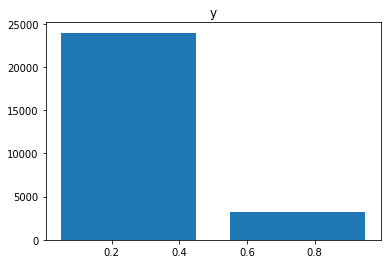

In [115]:
#目的変数の分布
plt.title('y')
plt.hist(train_df['y'],bins=2,rwidth=0.8)

In [116]:
#クロス集計
pd.crosstab(train_df['job'],train_df['y'])


y,0,1
job,,
admin.,2700,385
blue-collar,5456,430
entrepreneur,834,80
housemaid,697,68
management,4853,767
retired,1080,311
self-employed,828,117
services,2282,224
student,391,166


In [117]:
pd.crosstab(train_df['marital'],train_df['y'])

y,0,1
marital,,
divorced,2691,364
married,14744,1667
single,6519,1143


In [118]:
pd.crosstab(train_df['education'],train_df['y'])

y,0,1
education,,
primary,3798,352
secondary,12382,1500
tertiary,6790,1169
unknown,984,153


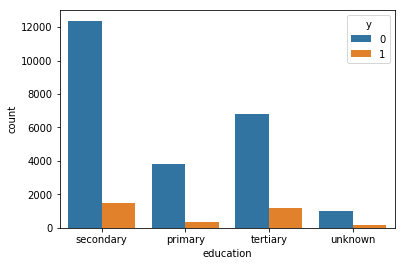

In [119]:
sns.countplot(x='education',hue='y',data=train_df)

In [120]:
pd.crosstab(train_df['default'],train_df['y'])

y,0,1
default,,
no,23507,3137
yes,447,37


In [121]:
pd.crosstab(train_df['contact'],train_df['y'])

y,0,1
contact,,
cellular,14951,2629
telephone,1457,230
unknown,7546,315


In [122]:
pd.crosstab(train_df['poutcome'],train_df['y'])

y,0,1
poutcome,,
failure,2578,391
other,950,173
success,312,574
unknown,20114,2036


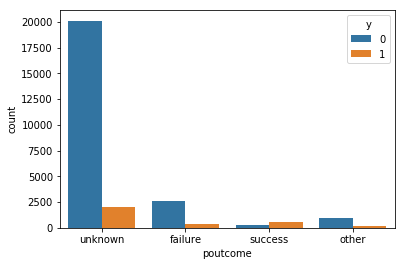

In [123]:
sns.countplot(x='poutcome',hue='y',data=train_df)

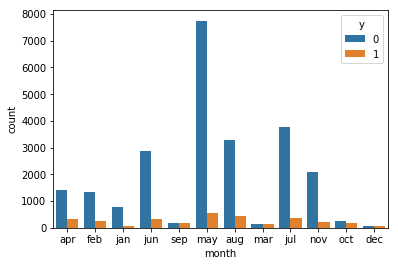

In [191]:
sns.countplot(x='month',hue='y',data=train_df)

In [124]:
#説明変数のうち数値データのもの
train_df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000
mean,13564.500000,40.951010,1355.800870,15.806215,260.711295,2.751769,40.528052,0.579733,0.117001
std,7831.323388,10.608542,3003.305272,8.337904,260.091727,3.126594,100.382462,2.503653,0.321427
min,1.000000,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6782.750000,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,13564.500000,39.000000,449.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,20346.250000,48.000000,1428.000000,21.000000,323.000000,3.000000,-1.000000,0.000000,0.000000
max,27128.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [125]:
test_df.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000
mean,9042.000000,40.914008,1371.980092,15.806725,254.340264,2.781950,39.702428,0.581209
std,5220.256794,10.634331,3105.985293,8.299509,253.591981,3.054651,99.747634,1.965265
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,4521.500000,33.000000,72.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,9042.000000,39.000000,447.000000,16.000000,178.000000,2.000000,-1.000000,0.000000
75%,13562.500000,48.000000,1427.000000,21.000000,314.000000,3.000000,-1.000000,0.000000
max,18083.000000,95.000000,98417.000000,31.000000,3881.000000,50.000000,854.000000,58.000000


In [126]:
#欠損値確認
train_df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [127]:
test_df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [128]:
#全説明変数確認
test_df.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown
5,6,43,services,married,primary,no,574,yes,no,cellular,8,may,140,1,-1,0,unknown
6,7,54,technician,married,secondary,no,324,yes,no,telephone,13,may,51,1,-1,0,unknown
7,8,41,blue-collar,married,secondary,no,121,yes,no,cellular,13,may,16,6,176,5,other
8,9,52,housemaid,married,primary,no,1466,no,yes,cellular,20,nov,150,1,-1,0,unknown
9,10,32,management,married,secondary,no,6217,yes,yes,cellular,18,nov,486,2,181,2,failure


In [129]:
#クロス集計
martial_ct = pd.crosstab(train_df['marital'],train_df['y'])
martial_ct

y,0,1
marital,,
divorced,2691,364
married,14744,1667
single,6519,1143


In [130]:
#ダミー変数化
marital_train_df = pd.get_dummies(train_df['marital'])
marital_test_df = pd.get_dummies(test_df['marital'])
marital_train_df.head()

,divorced,married,single
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [131]:
housing_ct = pd.crosstab(train_df['housing'],train_df['y'])
housing_ct

y,0,1
housing,,
no,9991,2012
yes,13963,1162


In [132]:
#mapping
housing_mapping = {'no':0,'yes':1}
train_df['housing'] = train_df['housing'].map(housing_mapping)
test_df['housing'] = test_df['housing'].map(housing_mapping)

#mapping
train_df['default'] = train_df['default'].map(housing_mapping)
test_df['default'] = test_df['default'].map(housing_mapping)

#mapping
train_df['loan'] = train_df['loan'].map(housing_mapping)
test_df['loan'] = test_df['loan'].map(housing_mapping)

#mapping
poutcome_mapping = {'unknown':0,'failure':2,'other':1,'success':3}
train_df['poutcome'] = train_df['poutcome'].map(poutcome_mapping)
test_df['poutcome'] = test_df['poutcome'].map(poutcome_mapping)

#mapping
education_mapping = {'unknown':0,'primary':1,'secondary':2,'tertiary':3}
train_df['education'] = train_df['education'].map(education_mapping)
test_df['education'] = test_df['education'].map(education_mapping)

poutcome_mapping = {'unknown':0,'failure':2,'other':1,'success':3}
train_df['poutcome'] = train_df['poutcome'].map(poutcome_mapping)
test_df['poutcome'] = test_df['poutcome'].map(poutcome_mapping)

train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,2,0,1756,1,0,cellular,3,apr,939,1,-1,0,0,1
1,2,51,entrepreneur,married,1,0,1443,0,0,cellular,18,feb,172,10,-1,0,0,1
2,3,36,management,single,3,0,436,0,0,cellular,13,apr,567,1,595,2,2,1
3,4,63,retired,married,2,0,474,0,0,cellular,25,jan,423,1,-1,0,0,1
4,5,31,management,single,3,0,354,0,0,cellular,30,apr,502,1,9,2,3,1


In [154]:
train_df_mk = train_df.loc[:,['age','balance','day','duration','campaign','pdays','previous','housing','poutcome','education']]
test_df_mk = test_df.loc[:,['age','balance','day','duration','campaign','pdays','previous','housing','poutcome','education']]

In [155]:
train_df_y = train_df.loc[:,'y']

In [156]:
#変換した数値データと数値データ
train_df_cc  = pd.concat([train_df_mk,marital_train_df, train_df_y], axis = 1)
test_df_cc  = pd.concat([test_df_mk,marital_test_df ], axis =1)
train_df_cc.head()

,age,balance,day,duration,campaign,pdays,previous,housing,poutcome,education,divorced,married,single,y
0,39,1756,3,939,1,-1,0,1,0,2,0,1,0,1
1,51,1443,18,172,10,-1,0,0,0,1,0,1,0,1
2,36,436,13,567,1,595,2,0,2,3,0,0,1,1
3,63,474,25,423,1,-1,0,0,0,2,0,1,0,1
4,31,354,30,502,1,9,2,0,3,3,0,0,1,1


In [157]:
train_df_cc  = pd.concat([train_df_mk,marital_train_df, train_df_y], axis = 1)
test_df_cc  = pd.concat([test_df_mk,marital_test_df ], axis =1)
train_df_cc.head()

,age,balance,day,duration,campaign,pdays,previous,housing,poutcome,education,divorced,married,single,y
0,39,1756,3,939,1,-1,0,1,0,2,0,1,0,1
1,51,1443,18,172,10,-1,0,0,0,1,0,1,0,1
2,36,436,13,567,1,595,2,0,2,3,0,0,1,1
3,63,474,25,423,1,-1,0,0,0,2,0,1,0,1
4,31,354,30,502,1,9,2,0,3,3,0,0,1,1


In [222]:
# 説明変数と目的変数を指定
X=train_df_cc.drop(['y'],axis=1)
X_2=test_df_cc
X.head()

,age,balance,day,duration,campaign,pdays,previous,housing,poutcome,education,divorced,married,single
0,39,1756,3,939,1,-1,0,1,0,2,0,1,0
1,51,1443,18,172,10,-1,0,0,0,1,0,1,0
2,36,436,13,567,1,595,2,0,2,3,0,0,1
3,63,474,25,423,1,-1,0,0,0,2,0,1,0
4,31,354,30,502,1,9,2,0,3,3,0,0,1


In [223]:
# 説明変数と目的変数を指定
y = train_df.loc[:, ['y']].values
y = y.reshape(-1)

In [224]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

scaler_2 = StandardScaler()
scaler_2.fit(X_2)
X_2std = scaler_2.transform(X_2)

In [225]:
# データセットの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.35, random_state=0)

In [226]:
#ロジスティック回帰の実行
lr = LogisticRegression(C=1.0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [227]:
# 正答率を出力
print('train acc: %.3f' % lr.score(X_train, y_train))
print('test acc: %.3f' % lr.score(X_test, y_test))

train acc: 0.898
test acc: 0.895


In [228]:
ans=(lr.predict_proba(X_2std))
ans[:,1]

array([0.92355661, 0.81350202, 0.00244312, ..., 0.01171595, 0.04248422,
       0.04270882])

In [230]:
result_df = pd.DataFrame({'':np.array(ans[:,1])})
result_df.index += 1 
result_df

,
1,0.923557
2,0.813502
3,0.002443
4,0.018937
5,0.122104
6,0.019025
7,0.015172
8,0.013692
9,0.056707
10,0.258673


In [231]:
csv_writer = result_df.to_csv('submit_data.csv')